In [40]:
#|default_exp app

In [44]:
#|export
!pip install -Uqq gradio
!pip install -Uqq fastai

from fastai.vision.all import *
import gradio as gr

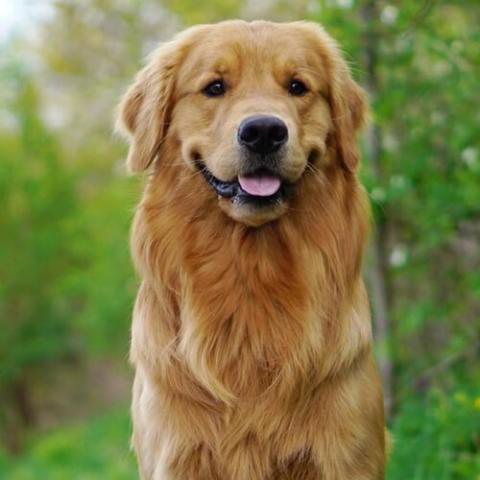

In [4]:
im = PILImage.create('test.jpg')
im

In [6]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

learn = load_learner('model.pkl')

In [27]:
print(learn.predict(im)[0] + "\tProb: " + str(round(torch.max(learn.predict(im)[2]).item(), 4)) )

'golden retriever   Prob: 0.9999'

In [29]:
#|export
def classify_img(img):
    pred,idx,probs = learn.predict(img)
    return str(pred + "   Prob: " + str(round(torch.max(probs).item(), 4)) )

In [31]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['test0.jpg', 'test1.jpg', 'test2.jpg']

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [34]:
!pip install nbdev

     ---------------------------------------- 64.8/64.8 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 58.1/58.1 kB 3.0 MB/s eta 0:00:00
  Using cached asttokens-2.2.1-py2.py3-none-any.whl (26 kB)


In [42]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful


In [50]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner

ValueError: not enough values to unpack (expected 4, got 3)